In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns

In [2]:
df = pd.read_excel('Capstonedata.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
2,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
3,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
4,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


In [3]:
df['Revenue']=df['Quantity']*df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.3
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.5
2,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.1
3,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.1
4,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.5


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      29999 non-null  object        
 1   StockCode    29999 non-null  object        
 2   Description  29995 non-null  object        
 3   Quantity     29999 non-null  int64         
 4   InvoiceDate  29999 non-null  datetime64[ns]
 5   Price        29999 non-null  float64       
 6   Customer ID  29992 non-null  float64       
 7   Country      29999 non-null  object        
 8   Revenue      29999 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 2.1+ MB


In [5]:
df['ABC'] = df['StockCode'].astype('category')
df_2 = df
df_2['year'] = pd.DatetimeIndex(df_2['InvoiceDate']).year
df_2['month'] = pd.DatetimeIndex(df_2['InvoiceDate']).month
df_2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,ABC,year,month
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.3,22752,2010,12
1,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.5,21730,2010,12
2,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.1,22633,2010,12
3,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.1,22632,2010,12
4,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.5,22960,2010,12


In [6]:
df_3=df_2.groupby(['StockCode','year','month'])['Revenue'].sum().to_frame().reset_index()
df_3["month"] = df_3.month.map("{:02}".format)
df_3.head()

,StockCode,year,month,Revenue
0,10002,2010,12,62.90
1,10002,2011,03,1.70
2,10120,2010,12,0.63
3,10120,2011,03,5.67
4,10125,2010,12,2.55


In [7]:
df_3['year_month']=df_3['year'].map(str) + '-' + df_3['month'].map(str)
df_3.head()

,StockCode,year,month,Revenue,year_month
0,10002,2010,12,62.90,2010-12
1,10002,2011,03,1.70,2011-03
2,10120,2010,12,0.63,2010-12
3,10120,2011,03,5.67,2011-03
4,10125,2010,12,2.55,2010-12


In [8]:
df_3 = df_3.pivot(index='StockCode',columns='year_month', values='Revenue').reset_index().fillna(0)
df_3.head()

year_month,StockCode,2010-12,2011-02,2011-03,2011-07,2011-12
0,10002,62.90,0.0,1.70,0.00,0.0
1,10120,0.63,0.0,5.67,0.00,0.0
2,10125,2.55,0.0,18.70,0.00,0.0
3,10133,17.85,0.0,45.05,35.28,0.0
4,10135,26.25,0.0,68.95,30.00,0.0


In [9]:
# to calculate total sales:
df_3['total_sales'] = df_3.iloc[:,1:13].sum(axis=1,numeric_only=True)
df_3.head()

year_month,StockCode,2010-12,2011-02,2011-03,2011-07,2011-12,total_sales
0,10002,62.90,0.0,1.70,0.00,0.0,64.60
1,10120,0.63,0.0,5.67,0.00,0.0,6.30
2,10125,2.55,0.0,18.70,0.00,0.0,21.25
3,10133,17.85,0.0,45.05,35.28,0.0,98.18
4,10135,26.25,0.0,68.95,30.00,0.0,125.20


In [10]:
df_3['average_sales'] = df_3['total_sales'] / 13
monthly_sales_columns = df_3.columns[1:13]  
df_3['std_dev'] = df_3[monthly_sales_columns].std(axis=1)
df_3.head()

year_month,StockCode,2010-12,2011-02,2011-03,2011-07,2011-12,total_sales,average_sales,std_dev
0,10002,62.90,0.0,1.70,0.00,0.0,64.60,4.969231,30.511001
1,10120,0.63,0.0,5.67,0.00,0.0,6.30,0.484615,2.828795
2,10125,2.55,0.0,18.70,0.00,0.0,21.25,1.634615,9.417719
3,10133,17.85,0.0,45.05,35.28,0.0,98.18,7.552308,34.997906
4,10135,26.25,0.0,68.95,30.00,0.0,125.20,9.630769,45.554963


In [11]:
df_3['CoV']=df_3['std_dev']/df_3['average_sales']

In [62]:
#xyz classification
def condition_xyz(x):
    if x<=5:
        return "X"
    elif x>=5 and x<=6:
        return "Y"
    else:
        return 'Z'

In [63]:
df_3['XYZ']=df_3['CoV'].apply(condition_xyz)
df_3.head(10)

year_month,StockCode,2010-12,2011-02,2011-03,2011-07,2011-12,total_sales,average_sales,std_dev,CoV,XYZ
0,10002,62.90,0.0,1.70,0.00,0.00,64.60,4.969231,30.511001,6.139985,Z
1,10120,0.63,0.0,5.67,0.00,0.00,6.30,0.484615,2.828795,5.837196,Y
2,10125,2.55,0.0,18.70,0.00,0.00,21.25,1.634615,9.417719,5.761428,Y
3,10133,17.85,0.0,45.05,35.28,0.00,98.18,7.552308,34.997906,4.634068,X
4,10135,26.25,0.0,68.95,30.00,0.00,125.20,9.630769,45.554963,4.730148,X
5,11001,25.35,0.0,0.00,0.00,0.00,25.35,1.950000,12.200029,6.256425,Z
6,15030,0.00,0.0,0.00,1.45,0.00,1.45,0.111538,0.697832,6.256425,Z
7,15034,0.28,0.0,6.72,13.44,0.00,20.44,1.572308,8.048594,5.118969,Y
8,15036,54.00,0.0,258.00,99.60,0.00,411.60,31.661538,155.680684,4.917028,X
9,15039,12.75,0.0,0.00,0.00,0.85,13.60,1.046154,6.263140,5.986825,Y


In [64]:
df_4 = df_3.groupby('StockCode').agg(total_revenue=('total_sales','sum')).sort_values(by='total_revenue', ascending=False).reset_index()
df_4.head()

,StockCode,total_revenue
0,22423,12878.25
1,21137,8147.82
2,85123A,6560.20
3,79321,5102.79
4,85099B,4996.20


In [65]:
df_4['rev_cum_sum'] = df_4['total_revenue'].cumsum()
df_4['rev_all'] = df_4['total_revenue'].sum()
df_4['sku_rev_percent'] = df_4['rev_cum_sum']/df_4['rev_all']
df_4.head(100)

,StockCode,total_revenue,rev_cum_sum,rev_all,sku_rev_percent
0,22423,12878.25,12878.25,569749.76,0.022603
1,21137,8147.82,21026.07,569749.76,0.036904
2,85123A,6560.20,27586.27,569749.76,0.048418
3,79321,5102.79,32689.06,569749.76,0.057374
4,85099B,4996.20,37685.26,569749.76,0.066144
...,...,...,...,...,...
95,84946,1131.74,197091.99,569749.76,0.345927
96,22383,1130.05,198222.04,569749.76,0.347911
97,22617,1121.85,199343.89,569749.76,0.349880
98,22846,1117.45,200461.34,569749.76,0.351841


In [66]:
#abc classification
def condition_abc(x):
    if x>0 and x<=0.80:
        return "A"
    elif x>0.80 and x<=0.90:
        return "B"
    else:
        return 'C'


df_4['ABC']=df_4['sku_rev_percent'].apply(condition_abc)
df_4.tail(10)

,StockCode,total_revenue,rev_cum_sum,rev_all,sku_rev_percent,ABC
2829,22186,-66.35,571799.31,569749.76,1.003597,C
2830,84012,-87.55,571711.76,569749.76,1.003444,C
2831,22942,-94.65,571617.11,569749.76,1.003277,C
2832,22591,-127.50,571489.61,569749.76,1.003054,C
2833,22769,-175.60,571314.01,569749.76,1.002746,C
2834,22580,-255.45,571058.56,569749.76,1.002297,C
2835,22588,-299.84,570758.72,569749.76,1.001771,C
2836,M,-313.72,570445.00,569749.76,1.001220,C
2837,22689,-337.50,570107.50,569749.76,1.000628,C
2838,D,-357.74,569749.76,569749.76,1.000000,C


In [67]:
df_4_check = df_4.groupby('ABC').agg(total_revenue=('total_revenue', sum)).reset_index()
df_4_check
df_3.head()

year_month,StockCode,2010-12,2011-02,2011-03,2011-07,2011-12,total_sales,average_sales,std_dev,CoV,XYZ
0,10002,62.90,0.0,1.70,0.00,0.0,64.60,4.969231,30.511001,6.139985,Z
1,10120,0.63,0.0,5.67,0.00,0.0,6.30,0.484615,2.828795,5.837196,Y
2,10125,2.55,0.0,18.70,0.00,0.0,21.25,1.634615,9.417719,5.761428,Y
3,10133,17.85,0.0,45.05,35.28,0.0,98.18,7.552308,34.997906,4.634068,X
4,10135,26.25,0.0,68.95,30.00,0.0,125.20,9.630769,45.554963,4.730148,X


In [68]:
df_4.head()

,StockCode,total_revenue,rev_cum_sum,rev_all,sku_rev_percent,ABC
0,22423,12878.25,12878.25,569749.76,0.022603,A
1,21137,8147.82,21026.07,569749.76,0.036904,A
2,85123A,6560.20,27586.27,569749.76,0.048418,A
3,79321,5102.79,32689.06,569749.76,0.057374,A
4,85099B,4996.20,37685.26,569749.76,0.066144,A


In [69]:
#merge abc and xyz for each sku
df_3_to_merge = df_3[['StockCode','total_sales','average_sales','std_dev','CoV','XYZ']]
df_4_to_merge = df_4[['StockCode','total_revenue','ABC']]
df_final = df_4_to_merge.merge(df_3_to_merge, on = 'StockCode', how='left')
df_final.head()

,StockCode,total_revenue,ABC,total_sales,average_sales,std_dev,CoV,XYZ
0,22423,12878.25,A,12878.25,990.634615,4846.642703,4.892462,X
1,21137,8147.82,A,8147.82,626.755385,3065.838304,4.891603,X
2,85123A,6560.20,A,6560.20,504.630769,2394.773906,4.745596,X
3,79321,5102.79,A,5102.79,392.522308,1928.397442,4.912835,X
4,85099B,4996.20,A,4996.20,384.323077,1790.099313,4.657798,X


In [70]:
df_final.tail()

,StockCode,total_revenue,ABC,total_sales,average_sales,std_dev,CoV,XYZ
2834,22580,-255.45,C,-255.45,-19.650000,136.303422,-6.936561,X
2835,22588,-299.84,C,-299.84,-23.064615,148.401508,-6.434164,X
2836,M,-313.72,C,-313.72,-24.132308,158.311956,-6.560166,X
2837,22689,-337.50,C,-337.50,-25.961538,162.426425,-6.256425,X
2838,D,-357.74,C,-357.74,-27.518462,157.269802,-5.715065,X


In [71]:
#concatenate abc and xyz
df_final['ABC_XYZ']=df_final['ABC'].astype(str) + df_final['XYZ'].astype(str)
df_final.head()

,StockCode,total_revenue,ABC,total_sales,average_sales,std_dev,CoV,XYZ,ABC_XYZ
0,22423,12878.25,A,12878.25,990.634615,4846.642703,4.892462,X,AX
1,21137,8147.82,A,8147.82,626.755385,3065.838304,4.891603,X,AX
2,85123A,6560.20,A,6560.20,504.630769,2394.773906,4.745596,X,AX
3,79321,5102.79,A,5102.79,392.522308,1928.397442,4.912835,X,AX
4,85099B,4996.20,A,4996.20,384.323077,1790.099313,4.657798,X,AX


In [72]:
#check on revenue vs classification
df_final_check = df_final.groupby('ABC_XYZ').agg(
total_sales=('total_sales',sum),
average_sales =('average_sales',sum)).reset_index().sort_values(by='total_sales', ascending=False)

In [73]:
df_final_check

,ABC_XYZ,total_sales,average_sales
0,AX,245724.57,18901.890000
1,AY,165036.88,12695.144615
2,AZ,44912.82,3454.832308
4,BY,26137.73,2010.594615
7,CY,24475.44,1882.726154
3,BX,21761.90,1673.992308
8,CZ,21556.70,1658.207692
6,CX,11003.31,846.408462
5,BZ,9140.41,703.108462


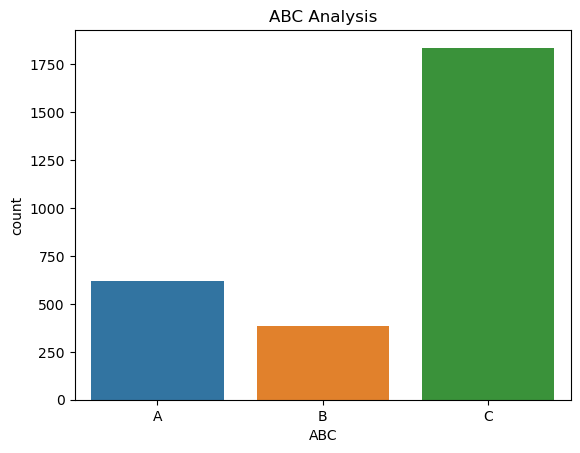

The ABC Analysis graph above helps you figure out which products are important based on how much money they make.
It tells you how many products are high-value, medium-value, or low-value, so you know which ones to pay more attention to.
A: These are the high-value products—products that bring in the most money.
B: These are medium-value products—important, but not as critical as A.
C: These are low-value products—products that don’t make much money.


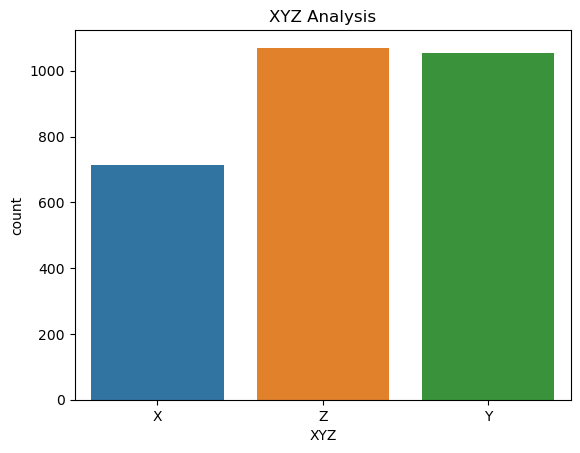

The XYZ Analysis graph above helps you see which products are predictable and which ones are unpredictable.
It helps you plan your inventory by showing you which products you can rely on for consistent sales and which ones you need to watch more closely because their demand is unpredictable.
X: These are products with stable demand—you can pretty much predict how many of these you’ll sell each month.
Y: These have moderate demand—you might see a rise or dip in sales from time to time, but you can generally predict how much you’ll sell.
Z: These are the unpredictable products—their sales are all over the place, and it’s hard to know when or how many you’ll sell.


In [74]:
sns.countplot(x='ABC', data=df_final)
plt.title('ABC Analysis')
plt.show()
print('''The ABC Analysis graph above helps you figure out which products are important based on how much money they make.
It tells you how many products are high-value, medium-value, or low-value, so you know which ones to pay more attention to.
A: These are the high-value products—products that bring in the most money.
B: These are medium-value products—important, but not as critical as A.
C: These are low-value products—products that don’t make much money.''')
# Plotting XYZ Distribution
sns.countplot(x='XYZ', data=df_final)
plt.title('XYZ Analysis')
plt.show()
print('''The XYZ Analysis graph above helps you see which products are predictable and which ones are unpredictable.
It helps you plan your inventory by showing you which products you can rely on for consistent sales and which ones you need to watch more closely because their demand is unpredictable.
X: These are products with stable demand—you can pretty much predict how many of these you’ll sell each month.
Y: These have moderate demand—you might see a rise or dip in sales from time to time, but you can generally predict how much you’ll sell.
Z: These are the unpredictable products—their sales are all over the place, and it’s hard to know when or how many you’ll sell.''')

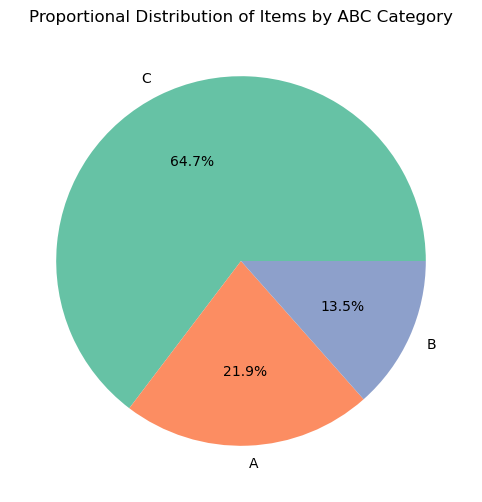

The pie chart gives you a quick, easy-to-understand view of how your products are split between high, medium, and low value categories.



In [75]:
abc_counts = df_final['ABC'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
abc_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2', len(abc_counts)))
plt.title('Proportional Distribution of Items by ABC Category')
plt.ylabel('')
plt.show()
print('''The pie chart gives you a quick, easy-to-understand view of how your products are split between high, medium, and low value categories.
''')

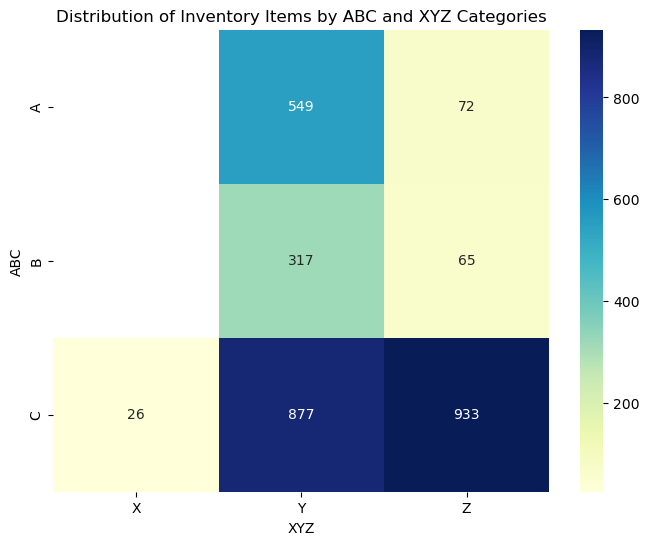

This is a heatmap, which is like a color-coded map showing where most of your products are located.
Here, it counts how many products belong to each combination of value (ABC) and demand (XYZ). This lets you easily see which types of products are most important (high value, stable demand) and which ones are less predictable (low value, erratic demand).
Here, the heatmap has dark squares where ABC = C and XYZ = Y, it means you have many low-value products with moderate demand.
And, the squares for ABC = A and XYZ = Z are light-colored or empty, it means you don’t have many high-value products with unpredictable demand.


In [26]:
pivot_df = df_final.pivot_table(values='StockCode', index='ABC', columns='XYZ', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Distribution of Inventory Items by ABC and XYZ Categories')
plt.show()
print('''This is a heatmap, which is like a color-coded map showing where most of your products are located.
Here, it counts how many products belong to each combination of value (ABC) and demand (XYZ). This lets you easily see which types of products are most important (high value, stable demand) and which ones are less predictable (low value, erratic demand).
Here, the heatmap has dark squares where ABC = C and XYZ = Y, it means you have many low-value products with moderate demand.
And, the squares for ABC = A and XYZ = Z are light-colored or empty, it means you don’t have many high-value products with unpredictable demand.''')

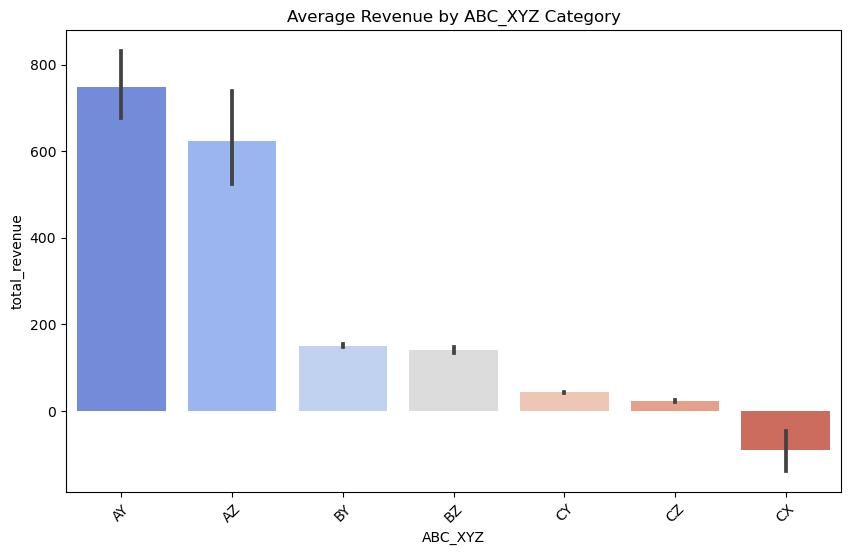

This bar chart is helping you understand the average revenue for each of the ABC_XYZ categories.
Taller bars mean the products in that group are making more money.
Shorter bars mean the products in that group are making less money.
Focus on the high-revenue categories like A-X, because they generate the most income.
Evaluate the lower-revenue categories and decide if you need to adjust strategies for them.



In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ABC_XYZ', y='total_revenue', data=df_final, palette='coolwarm')
plt.title('Average Revenue by ABC_XYZ Category')
plt.xticks(rotation=45)
plt.show()
print('''This bar chart is helping you understand the average revenue for each of the ABC_XYZ categories.
Taller bars mean the products in that group are making more money.
Shorter bars mean the products in that group are making less money.
Focus on the high-revenue categories like A-X, because they generate the most income.
Evaluate the lower-revenue categories and decide if you need to adjust strategies for them.
''')

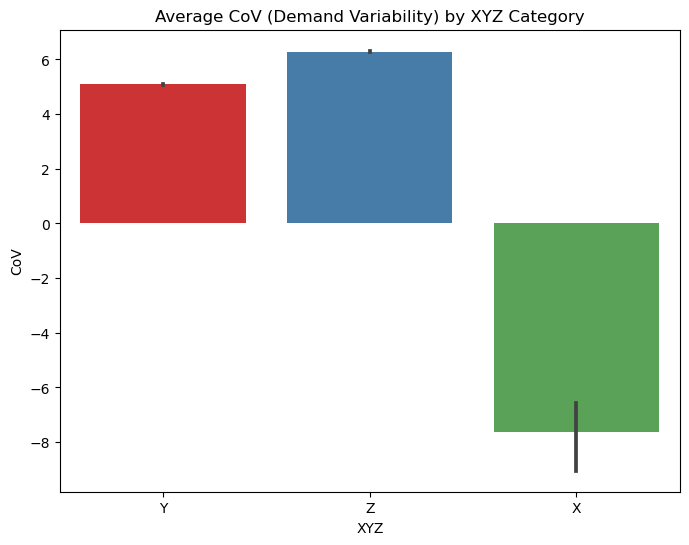

The chart shows how much the demand for products fluctuates for each type of demand (X, Y, or Z).
Low CoV means stable demand.
High CoV means erratic or highly variable demand.
Therefore, low bars indicate products in that category have more stable demand and tall bars indicate products in that category have a lot of demand fluctuations.
Here, X products (stable demand) have a low CoV, so you can feel confident that you can reliably stock them.
And, Z products (erratic demand) have a high CoV, so you should be more cautious and flexible in how much you keep in stock.



In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='XYZ', y='CoV', data=df_final, palette='Set1')
plt.title('Average CoV (Demand Variability) by XYZ Category')
plt.show()
print('''The chart shows how much the demand for products fluctuates for each type of demand (X, Y, or Z).
Low CoV means stable demand.
High CoV means erratic or highly variable demand.
Therefore, low bars indicate products in that category have more stable demand and tall bars indicate products in that category have a lot of demand fluctuations.
Here, X products (stable demand) have a low CoV, so you can feel confident that you can reliably stock them.
And, Z products (erratic demand) have a high CoV, so you should be more cautious and flexible in how much you keep in stock.
''')

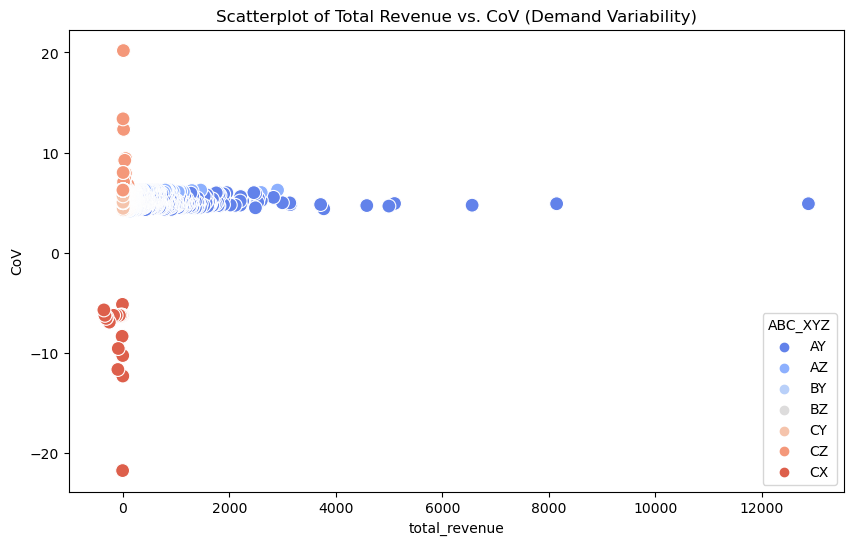

The scatterplot shows a relationship between how much money a product makes (total revenue) and how unpredictable its demand is (CoV).
The dot far to the right means the product makes a lot of money. And the dot high up on the chart means the product’s demand is very unpredictable.


In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='CoV', data=df_final, hue='ABC_XYZ', palette='coolwarm', s=100)
plt.title('Scatterplot of Total Revenue vs. CoV (Demand Variability)')
plt.show()
print('''The scatterplot shows a relationship between how much money a product makes (total revenue) and how unpredictable its demand is (CoV).
The dot far to the right means the product makes a lot of money. And the dot high up on the chart means the product’s demand is very unpredictable.''')

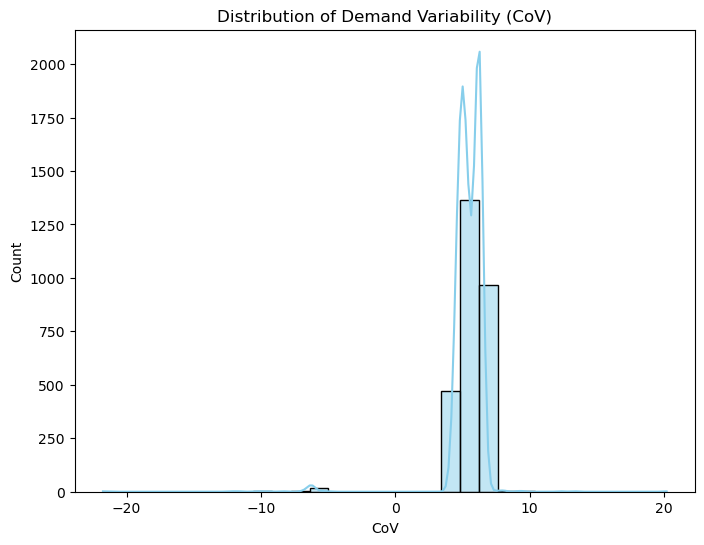

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df_final['CoV'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Demand Variability (CoV)')
plt.show()

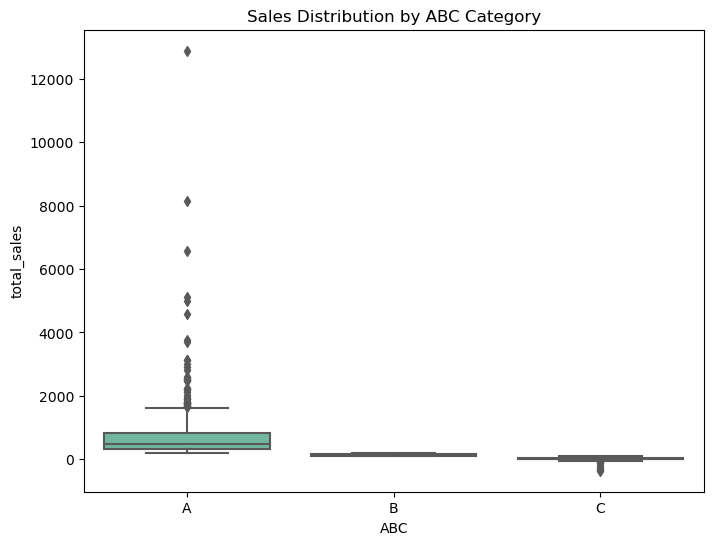

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ABC', y='total_sales', data=df_final, palette='Set2')
plt.title('Sales Distribution by ABC Category')
plt.show()

In [33]:
#df_final.to_csv('capstone2.csv',index = False)